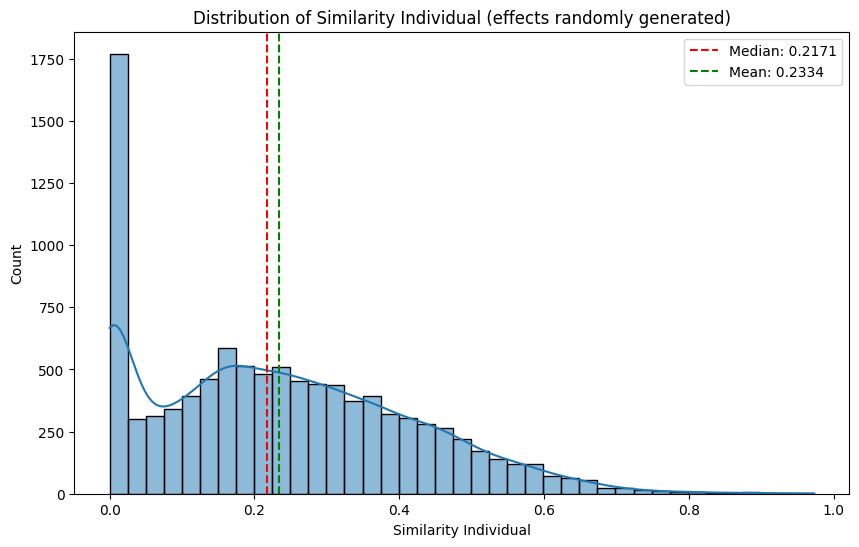

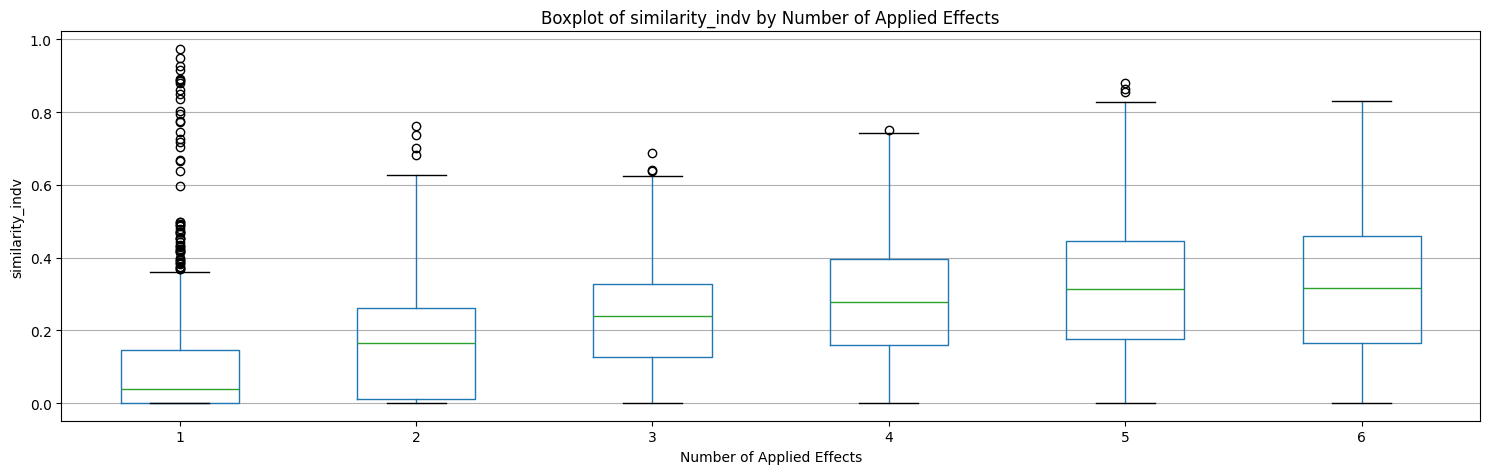

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Read the CSV file
df = pd.read_csv('./results/dataset_audios_guitar_random_BIG.csv')

# Convert similarity_indv to numeric type
df['similarity_indv'] = pd.to_numeric(df['similarity_indv'], errors='coerce')

median_value = df['similarity_indv'].median()
mean_value = df['similarity_indv'].mean()

# Plot 1: Distribution of similarity_indv
plt.figure(figsize=(10, 6))
sns.histplot(df['similarity_indv'], kde=True)
plt.axvline(median_value, color='r', linestyle='--', label=f'Median: {median_value:.4f}')
plt.axvline(mean_value, color='g', linestyle='--', label=f'Mean: {mean_value:.4f}')
plt.title('Distribution of Similarity Individual (effects randomly generated)')
plt.xlabel('Similarity Individual')
plt.ylabel('Count')
plt.legend()
plt.show()

# Function to count items in the applied_effects dictionary
def count_effects(effects_str):
    effects_dict = ast.literal_eval(effects_str)
    return len(effects_dict)

# Count items in applied_effects
df['effects_count'] = df['applied_effects'].apply(count_effects)

# Plot 2: Box plot of similarity_indv vs number of effects
ax = df.boxplot(column="similarity_indv", by="effects_count", grid=False, showfliers=True)

# Adjust the figure size after creating the plot
fig = plt.gcf()
fig.set_size_inches(15, 5)

# Adjust the plot labels and title
plt.xlabel('Number of Applied Effects')
plt.ylabel('similarity_indv')
plt.title('Boxplot of similarity_indv by Number of Applied Effects')
plt.suptitle('')  # Removes the automatic title from pandas boxplot

plt.grid(True, axis='y')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the boxplot
plt.show()